# DAL Assignment-2
# Logistic Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'large'}
pylab.rcParams.update(params)

In [3]:
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")

In [4]:
print("Training data:", train.shape)
print("Test data:", test.shape)

Training data: (891, 12)
Test data: (418, 11)


In [5]:
print('The number of samples into the train data is {}.'.format(train.shape[0]))
print('The number of samples into the test data is {}.'.format(test.shape[0]))

The number of samples into the train data is 891.
The number of samples into the test data is 418.


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
print(f"Training data missing values: \n{train.isnull().sum()}\n\n")
print(f"Test data missing values: \n{test.isnull().sum()}")

Training data missing values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Test data missing values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Data Visualisation

### Age

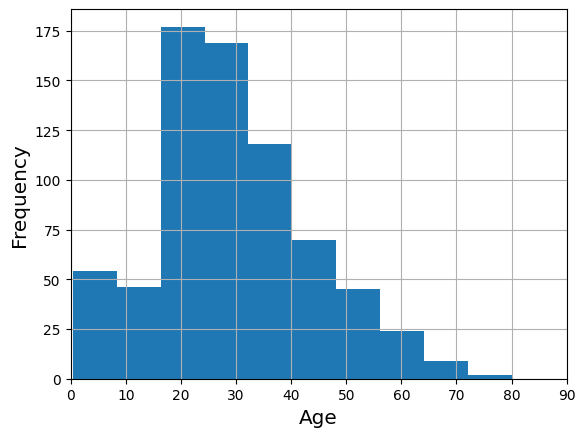

In [10]:
data = train["Age"].hist()
data.set(xlabel='Age')
data.set(ylabel='Frequency')
plt.xlim(0,90)
plt.savefig('age_histogram.png')
plt.show()

### Port of Embarkment

In [11]:
data = train["Embarked"].value_counts()
print(data)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


We can input missing values with Southampton as that is the port where maximum passengers boarded.

In [12]:
train["Embarked"] = train["Embarked"].fillna('S')

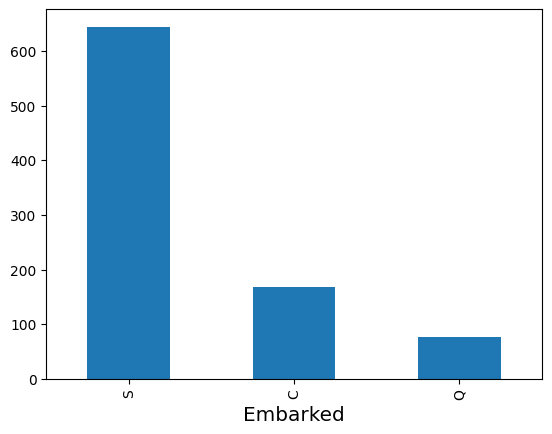

In [13]:
data.plot.bar()
plt.savefig('port_histogram.png')

## Exploratory Data Analysis

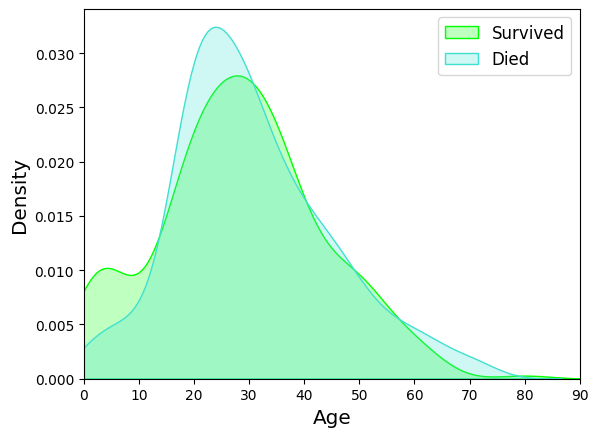

In [14]:
plt.figure()
ax = sns.kdeplot(train["Age"][train.Survived == 1], color="lime", fill=True)
sns.kdeplot(train["Age"][train.Survived == 0], color="turquoise", fill=True)
plt.legend(['Survived', 'Died'])
# plt.title('Age versus Survival', fontsize=10)
ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.savefig('Age versus Survival.png')
plt.show()

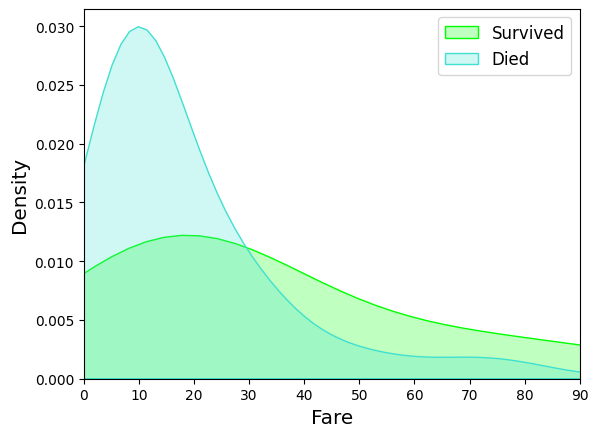

In [15]:
plt.figure()
ax = sns.kdeplot(train["Fare"][train.Survived == 1], color="lime", fill=True)
sns.kdeplot(train["Fare"][train.Survived == 0], color="turquoise", fill=True)
plt.legend(['Survived', 'Died'])
# plt.title('Fare versus Survival',fontsize = 10)
ax.set(xlabel='Fare')
plt.xlim(0,90)
plt.savefig('Fare versus Survival.png')
plt.show()

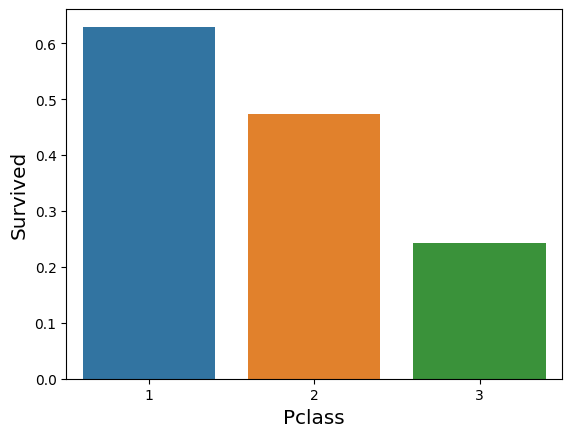

In [16]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train, errorbar = None)
plt.savefig('Passenger Class versus Survival.png')
plt.show()

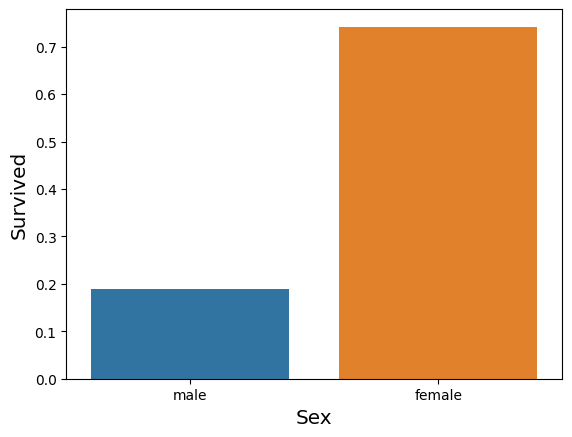

In [17]:
sns.barplot(x='Sex',y='Survived',data = train, errorbar=None)
sex_mapping = {"male": 0, "female": 1}
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
plt.savefig('Sex versus Survival.png')
plt.show()

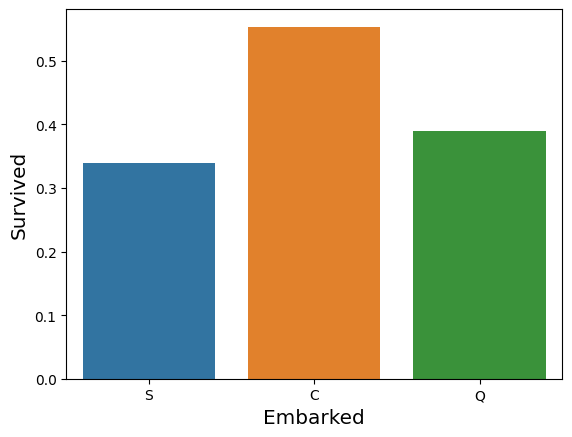

In [18]:
sns.barplot(x='Embarked',y='Survived',data = train, errorbar=None)
pd.pivot_table(index = 'Embarked',data = train,values = ['Fare','Survived'],aggfunc = {'Fare':np.mean,'Survived':np.mean})
plt.savefig('Port of Embarkation versus Survival.png')
plt.show()

In [19]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Feature Engineering
#### The `titles` function extracts the titles from each name and creates a new column containing titles corresponding to each passenger. Once we have this data, we no longer require the `name` column.

In [20]:
def titles(df):
    title = []
    for name in df['Name']:
        namesplit = name.split(',')
        title_withspace = namesplit[1].split('.')[0]
        title.append(title_withspace.strip())
    df['Title'] = title 
    return df

train = titles(train)
test = titles(test)

def cabintype(df):
    df['Cabin'].fillna(value = 'U', inplace = True)
    df['Cabin'] = df['Cabin'].str[:1]
    return df  

train = cabintype(train)
test = cabintype(test)
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [22]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1
for dataset in [train, test]:
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1
    
print(train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean())

   Alone  Survived
0      0  0.505650
1      1  0.303538


In [23]:
dropCols = ['Ticket', 'SibSp', 'Parch','FamilySize', 'Cabin']
train = train.drop(dropCols, axis=1)
train = train.drop(['PassengerId'], axis=1)
passenger_id = test["PassengerId"]
test = test.drop(['PassengerId'], axis=1)
test = test.drop(dropCols, axis=1)

In [24]:
for dataset in [train, test]:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'),inplace =True)
    dataset['Age'] = dataset['Age'].astype(int)
    dataset['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(float)

In [25]:
target = train['Survived']
train_data = train.drop('Survived', axis=1)
print(train_data.info())
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int32  
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int64  
 5   Title     891 non-null    float64
 6   Alone     891 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB
None


Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
Alone       0
dtype: int64

## Logistic Regression Model 

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)  # Increase max_iter
model.fit(train_data, target)
accuracy = model.score(train_data, target)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8159371492704826


In [27]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(target, model.predict(train_data))

index = ["Prediction positive", "Prediction negative"]
columns = ["Label positive", "Label negative"]
pd.DataFrame(matrix, columns=columns, index=index)

,Label positive,Label negative
Prediction positive,476,73
Prediction negative,91,251


In [28]:
predictions = model.predict(test)

results = pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": predictions
    })
results.to_excel(r'test_output.xlsx', sheet_name='Titanic', index = False)